In [1]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
data = pd.read_csv("all_month.csv")
data.head()


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2024-01-18T02:18:19.690Z,38.807835,-122.823334,2.03,1.49,md,21.0,54.0,0.004681,0.02,...,2024-01-18T02:19:54.732Z,"7 km WNW of The Geysers, CA",earthquake,0.22,0.31,0.150,22.0,automatic,nc,nc
1,2024-01-18T02:16:52.710Z,38.808498,-122.823669,2.01,1.33,md,23.0,53.0,0.004320,0.02,...,2024-01-18T02:28:11.196Z,"7 km WNW of The Geysers, CA",earthquake,0.19,0.34,0.140,23.0,automatic,nc,nc
2,2024-01-18T01:55:45.006Z,64.994500,-147.409700,5.20,1.50,ml,NaN,NaN,NaN,0.60,...,2024-01-18T02:03:52.136Z,"10 km ENE of Fox, Alaska",earthquake,NaN,0.30,NaN,NaN,automatic,ak,ak
3,2024-01-18T01:48:21.130Z,36.020333,-117.781167,1.55,1.39,ml,27.0,62.0,0.013780,0.16,...,2024-01-18T01:54:25.834Z,"15 km NE of Little Lake, CA",earthquake,0.17,0.16,0.139,11.0,automatic,ci,ci
4,2024-01-18T01:46:32.440Z,38.826668,-122.853836,2.44,0.28,md,10.0,99.0,0.002529,0.01,...,2024-01-18T02:04:12.038Z,"10 km WNW of The Geysers, CA",earthquake,0.40,1.07,0.160,11.0,automatic,nc,nc


In [3]:
#ensuring the time into a datetime object that we can use, although a previous check said it was an object
data["time"] = pd.to_datetime(data["time"])


In [4]:
data.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,8886.000000,8886.000000,8886.000000,8886.000000,7092.000000,7092.000000,5965.000000,8886.000000,6349.000000,8886.000000,7076.000000,7090.000000
mean,39.308700,-111.205884,22.779244,1.636482,24.467851,109.605255,0.553678,0.276822,1.638979,2.037707,0.247804,16.977292
std,18.276848,68.838488,51.627071,1.223509,23.427687,63.652406,2.196805,0.273490,2.914440,6.507358,0.390754,29.095417
min,-65.494800,-179.957700,-3.160000,-1.270000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.408500,-150.502125,3.000000,0.830000,10.000000,64.000000,0.012000,0.090000,0.250000,0.440000,0.110000,6.000000
50%,38.816250,-122.264500,7.738300,1.420000,18.000000,91.000000,0.053830,0.170000,0.450000,0.750000,0.173000,11.000000
75%,53.236350,-114.302992,16.490000,2.050000,32.000000,140.000000,0.139100,0.420000,1.000000,1.500000,0.244314,19.000000
max,80.512900,179.884600,660.826000,7.500000,598.000000,344.000000,43.556000,3.250000,17.780000,449.100000,5.180000,722.000000


In [5]:
data.info()
#Here we can see that some of the variables are missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8886 entries, 0 to 8885
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   time             8886 non-null   datetime64[ns, UTC]
 1   latitude         8886 non-null   float64            
 2   longitude        8886 non-null   float64            
 3   depth            8886 non-null   float64            
 4   mag              8886 non-null   float64            
 5   magType          8886 non-null   object             
 6   nst              7092 non-null   float64            
 7   gap              7092 non-null   float64            
 8   dmin             5965 non-null   float64            
 9   rms              8886 non-null   float64            
 10  net              8886 non-null   object             
 11  id               8886 non-null   object             
 12  updated          8886 non-null   object             
 13  place            8

In [6]:
remove_missing_data = data.dropna()
#remove_missing_data.info()
remove_dupes = remove_missing_data.drop_duplicates()
#remove_dupes.info() #looks to be no duplicates
#remove irrelevant variables
remove_irrev = remove_dupes.drop(columns =["updated", "status", "net", "nst", "id"])
#remove_irrev.info()
#check for structural errors in the strings
#vars to check magType, place, type, location, mag
check_vars = pd.DataFrame(remove_irrev[["magType", "place", "type", "locationSource","magSource"]])


cleaned_data = remove_irrev[:]
cleaned_data


,time,latitude,longitude,depth,mag,magType,gap,dmin,rms,place,type,horizontalError,depthError,magError,magNst,locationSource,magSource
0,2024-01-18 02:18:19.690000+00:00,38.807835,-122.823334,2.03,1.49,md,54.0,0.004681,0.02,"7 km WNW of The Geysers, CA",earthquake,0.22,0.310,0.150,22.0,nc,nc
1,2024-01-18 02:16:52.710000+00:00,38.808498,-122.823669,2.01,1.33,md,53.0,0.004320,0.02,"7 km WNW of The Geysers, CA",earthquake,0.19,0.340,0.140,23.0,nc,nc
3,2024-01-18 01:48:21.130000+00:00,36.020333,-117.781167,1.55,1.39,ml,62.0,0.013780,0.16,"15 km NE of Little Lake, CA",earthquake,0.17,0.160,0.139,11.0,ci,ci
4,2024-01-18 01:46:32.440000+00:00,38.826668,-122.853836,2.44,0.28,md,99.0,0.002529,0.01,"10 km WNW of The Geysers, CA",earthquake,0.40,1.070,0.160,11.0,nc,nc
5,2024-01-18 01:38:29.351000+00:00,-6.303000,101.441700,10.00,4.60,mb,190.0,2.449000,0.80,"291 km SSW of Bengkulu, Indonesia",earthquake,10.38,1.948,0.136,16.0,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8879,2023-12-19 02:47:13.780000+00:00,35.042000,-117.649167,1.74,0.75,ml,67.0,0.114100,0.11,"5 km N of Boron, CA",earthquake,0.22,0.340,0.151,6.0,ci,ci
8881,2023-12-19 02:43:10.876000+00:00,-7.242500,119.138700,593.76,4.90,mb,26.0,2.074000,0.75,"142 km NNE of Bima, Indonesia",earthquake,3.86,6.268,0.054,107.0,us,us
8882,2023-12-19 02:42:29.472000+00:00,-22.785000,172.366200,10.00,5.30,mww,74.0,4.546000,0.74,southeast of the Loyalty Islands,earthquake,10.15,1.808,0.075,17.0,us,us
8883,2023-12-19 02:39:21.180000+00:00,33.111333,-115.624833,9.51,1.34,ml,93.0,0.066410,0.19,"8 km N of Westmorland, CA",earthquake,0.21,0.520,0.214,20.0,ci,ci


<function matplotlib.pyplot.show(close=None, block=None)>

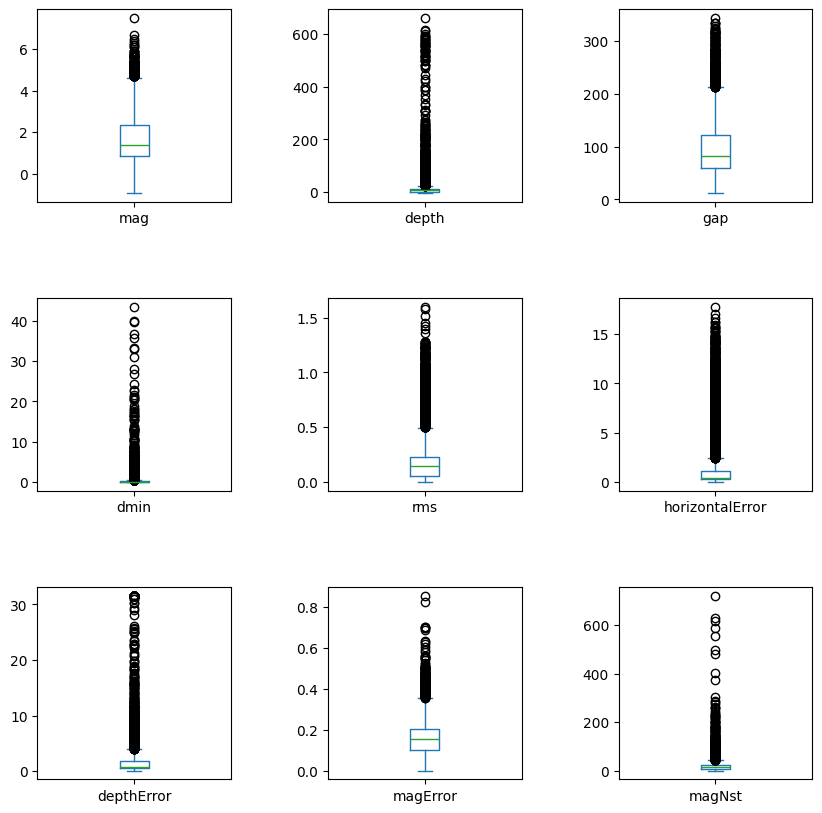

In [10]:
#use boxplots to determine any outliers
features = cleaned_data.columns.values.tolist()
features_num_list = [e for e in features if e not in ('time', 'magType', 'place', 'type', 'locationSource', 'magSource', "latitude", "longitude", "time")]
features_num_list

#fig, ax = plt.subplots(3,3)
#for x in features_num_list:
    #boxplot = cleaned_data


fig, ax = plt.subplots(3,3, figsize=(10,10))

plt.subplots_adjust(wspace=0.5, hspace=0.5)

cleaned_data.plot( y = "mag", kind = "box", ax = ax[0,0])
cleaned_data.plot( y = "depth", kind = "box", ax = ax[0,1])
cleaned_data.plot( y = "gap", kind = "box", ax = ax[0,2])
cleaned_data.plot( y = "dmin", kind = "box", ax = ax[1,0])
cleaned_data.plot( y = "rms", kind = "box", ax = ax[1,1])
cleaned_data.plot( y = "horizontalError", kind = "box", ax = ax[1,2])
cleaned_data.plot( y = "depthError", kind = "box", ax = ax[2,0])
cleaned_data.plot( y = "magError", kind = "box", ax = ax[2,1])
cleaned_data.plot( y = "magNst", kind = "box", ax = ax[2,2])
plt.show


Using boxplots may give us an idea of existing outliers in the dataset. However, in this instance, due to the large variance in the dataset due to the nature of earthquakes, the boxplots show a significant number of outliers above the upper range. This is not a valid representation of the data as using a quartile or median approach, at this stage, is not appropriate.  

C:\Users\Tony\AppData\Local\Temp\ipykernel_29624\2139627553.py:48: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


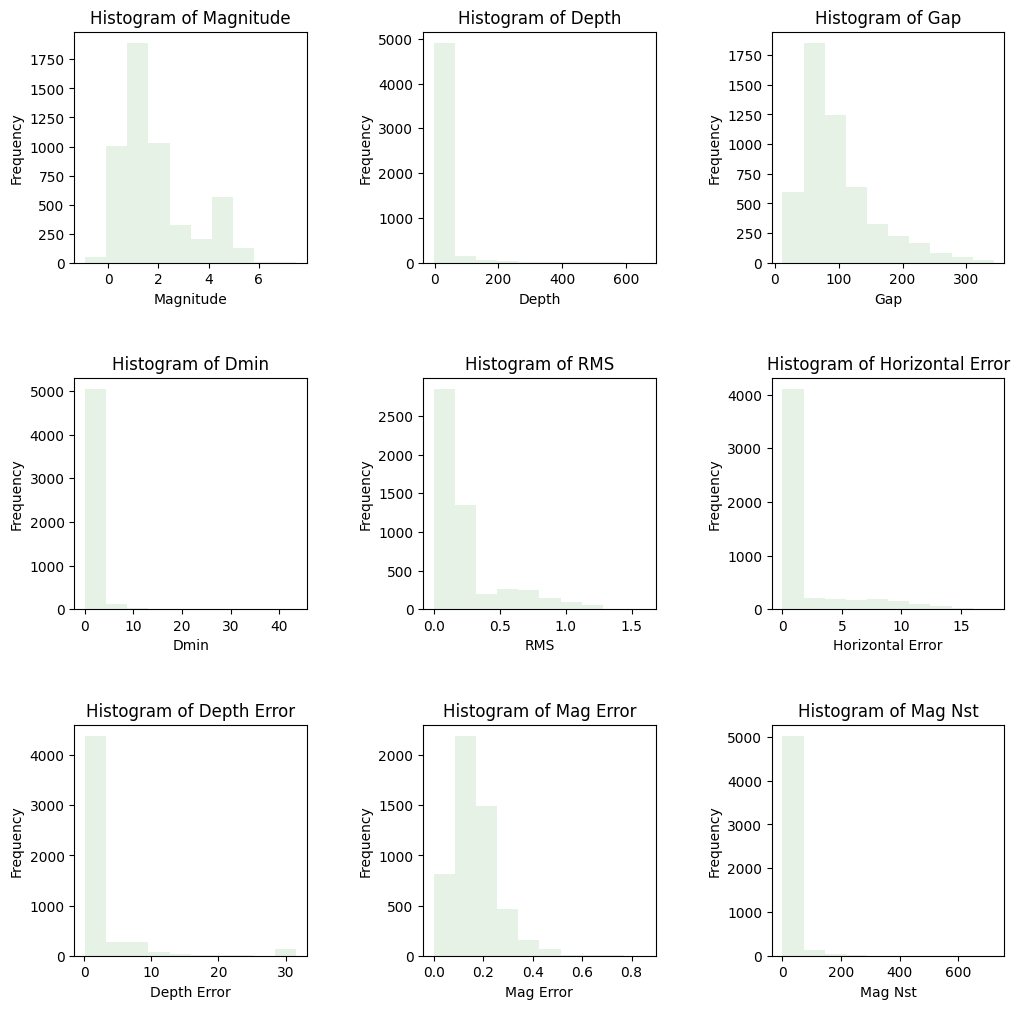

In [8]:
fig, ax = plt.subplots(3,3, figsize=(12,12))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
ax[0,0].hist(cleaned_data["mag"], alpha=0.1, color="green")
ax[0,1].hist(cleaned_data["depth"], alpha=0.1, color="green")
ax[0,2].hist(cleaned_data["gap"], alpha=0.1, color="green")
ax[1,0].hist(cleaned_data["dmin"], alpha=0.1, color="green")
ax[1,1].hist(cleaned_data["rms"], alpha=0.1, color="green")
ax[1,2].hist(cleaned_data["horizontalError"], alpha=0.1, color="green")
ax[2,0].hist(cleaned_data["depthError"], alpha=0.1, color="green")
ax[2,1].hist(cleaned_data["magError"], alpha=0.1, color="green")
ax[2,2].hist(cleaned_data["magNst"], alpha=0.1, color="green")

ax[0,0].set_xlabel("Magnitude")
ax[0,0].set_ylabel("Frequency")
ax[0,0].set_title("Histogram of Magnitude")

ax[0,1].set_xlabel("Depth")
ax[0,1].set_ylabel("Frequency")
ax[0,1].set_title("Histogram of Depth")

ax[0,2].set_xlabel("Gap")
ax[0,2].set_ylabel("Frequency")
ax[0,2].set_title("Histogram of Gap")

ax[1,0].set_xlabel("Dmin")
ax[1,0].set_ylabel("Frequency")
ax[1,0].set_title("Histogram of Dmin")

ax[1,1].set_xlabel("RMS")
ax[1,1].set_ylabel("Frequency")
ax[1,1].set_title("Histogram of RMS")

ax[1,2].set_xlabel("Horizontal Error")
ax[1,2].set_ylabel("Frequency")
ax[1,2].set_title("Histogram of Horizontal Error")

ax[2,0].set_xlabel("Depth Error")
ax[2,0].set_ylabel("Frequency")
ax[2,0].set_title("Histogram of Depth Error")

ax[2,1].set_xlabel("Mag Error")
ax[2,1].set_ylabel("Frequency")
ax[2,1].set_title("Histogram of Mag Error")

ax[2,2].set_xlabel("Mag Nst")
ax[2,2].set_ylabel("Frequency")
ax[2,2].set_title("Histogram of Mag Nst")
fig.show()

